Voice shape[0]: 136649
Voice sampling frequency: 44100


/tmp/ipykernel_31364/141418238.py:9: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, voice = wav.read(f'../Beamforming simulation experiment/Input_voices/voice_{I+1}.wav')


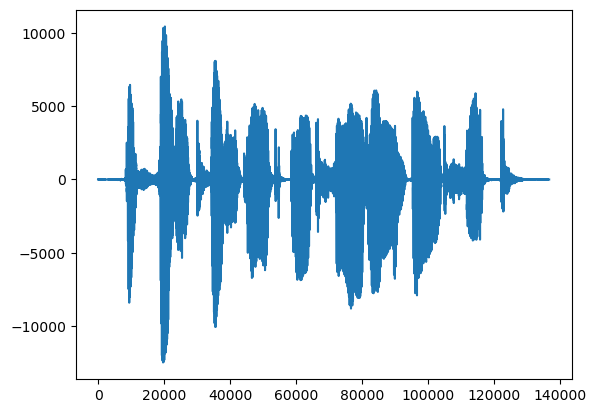

In [1]:
from scipy.io import wavfile as wav
import numpy as np
from matplotlib import pyplot as plt
from class_defs import virtualizer

I = 0 # voice index
D = 'l' # direction

fs, voice = wav.read(f'../Beamforming simulation experiment/Input_voices/voice_{I+1}.wav')
voice = np.array(voice, dtype=np.float32)[:, 0] # form a numpy array from the first channel

print(f'Voice shape[0]: {voice.shape[0]}')
print(f'Voice sampling frequency: {fs}')

plt.plot(voice)
plt.show()

In [2]:
pad_length = 1024-voice.shape[0]%1024
if pad_length:
    voice = np.pad(voice, (0, 1024-voice.shape[0]%1024))


print(f'Voice shape[0]: {voice.shape[0]}')
print(f'Voice shape[0]: {voice.shape[0]}, {voice.shape[0]/1024} blocks of 1024')

Voice shape[0]: 137216
Voice shape[0]: 137216, 134.0 blocks of 1024


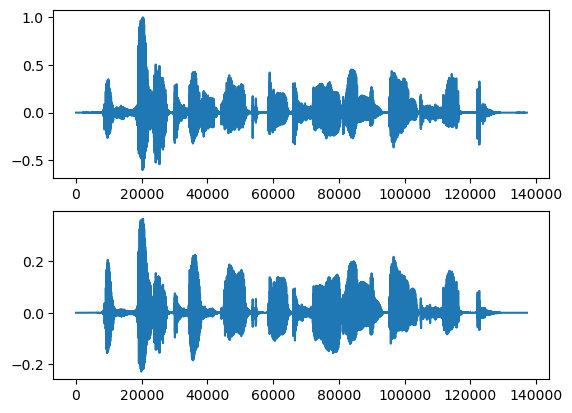

In [3]:
virt = virtualizer(D)
n_blocks = voice.shape[0]//1024

voice = np.split(voice, n_blocks)
voice = [virt.virtualize(block) for block in voice]

final_stereo = np.hstack(voice).T

# final processing: normalization, stripping imag component
final_stereo = np.real(final_stereo)
maximum = np.max(final_stereo, axis=None) # don't care about axis
final_stereo /= maximum

plt.subplot(2, 1, 1)
plt.plot(final_stereo[:, 0])
plt.subplot(2, 1, 2)
plt.plot(final_stereo[:, 1])
plt.show()

In [4]:
final_stereo_int = (32767*final_stereo).astype(np.int16)
wav.write('final_stereo_2.wav', 44100, final_stereo_int)